# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
from TRAIN.architecture.archeader import bert



Chosen class grouping: all-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes exists. Continuing with execution
device: mps
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/distilbert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/prajjwal1/bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
TRAIN_classes = 'alpha-classes'

data_config = {
  "data_unit" : sup.DATA_S_PV,
  "seq_len" : 12,
  "PH2" : False,
  "input_dim" : 72,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : -1,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 128,
  

}

train_config = {
  "device" : bert.device,
  "arch" : sup.TRAIN_BERT_CODE,
  "loadable" : bert.BERT_BASE,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 1e-4,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" 
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, 
                  train_config=train_config)

In [6]:
model.fit(verbose=True, perfect=False)

0.823728813559322


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:225: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


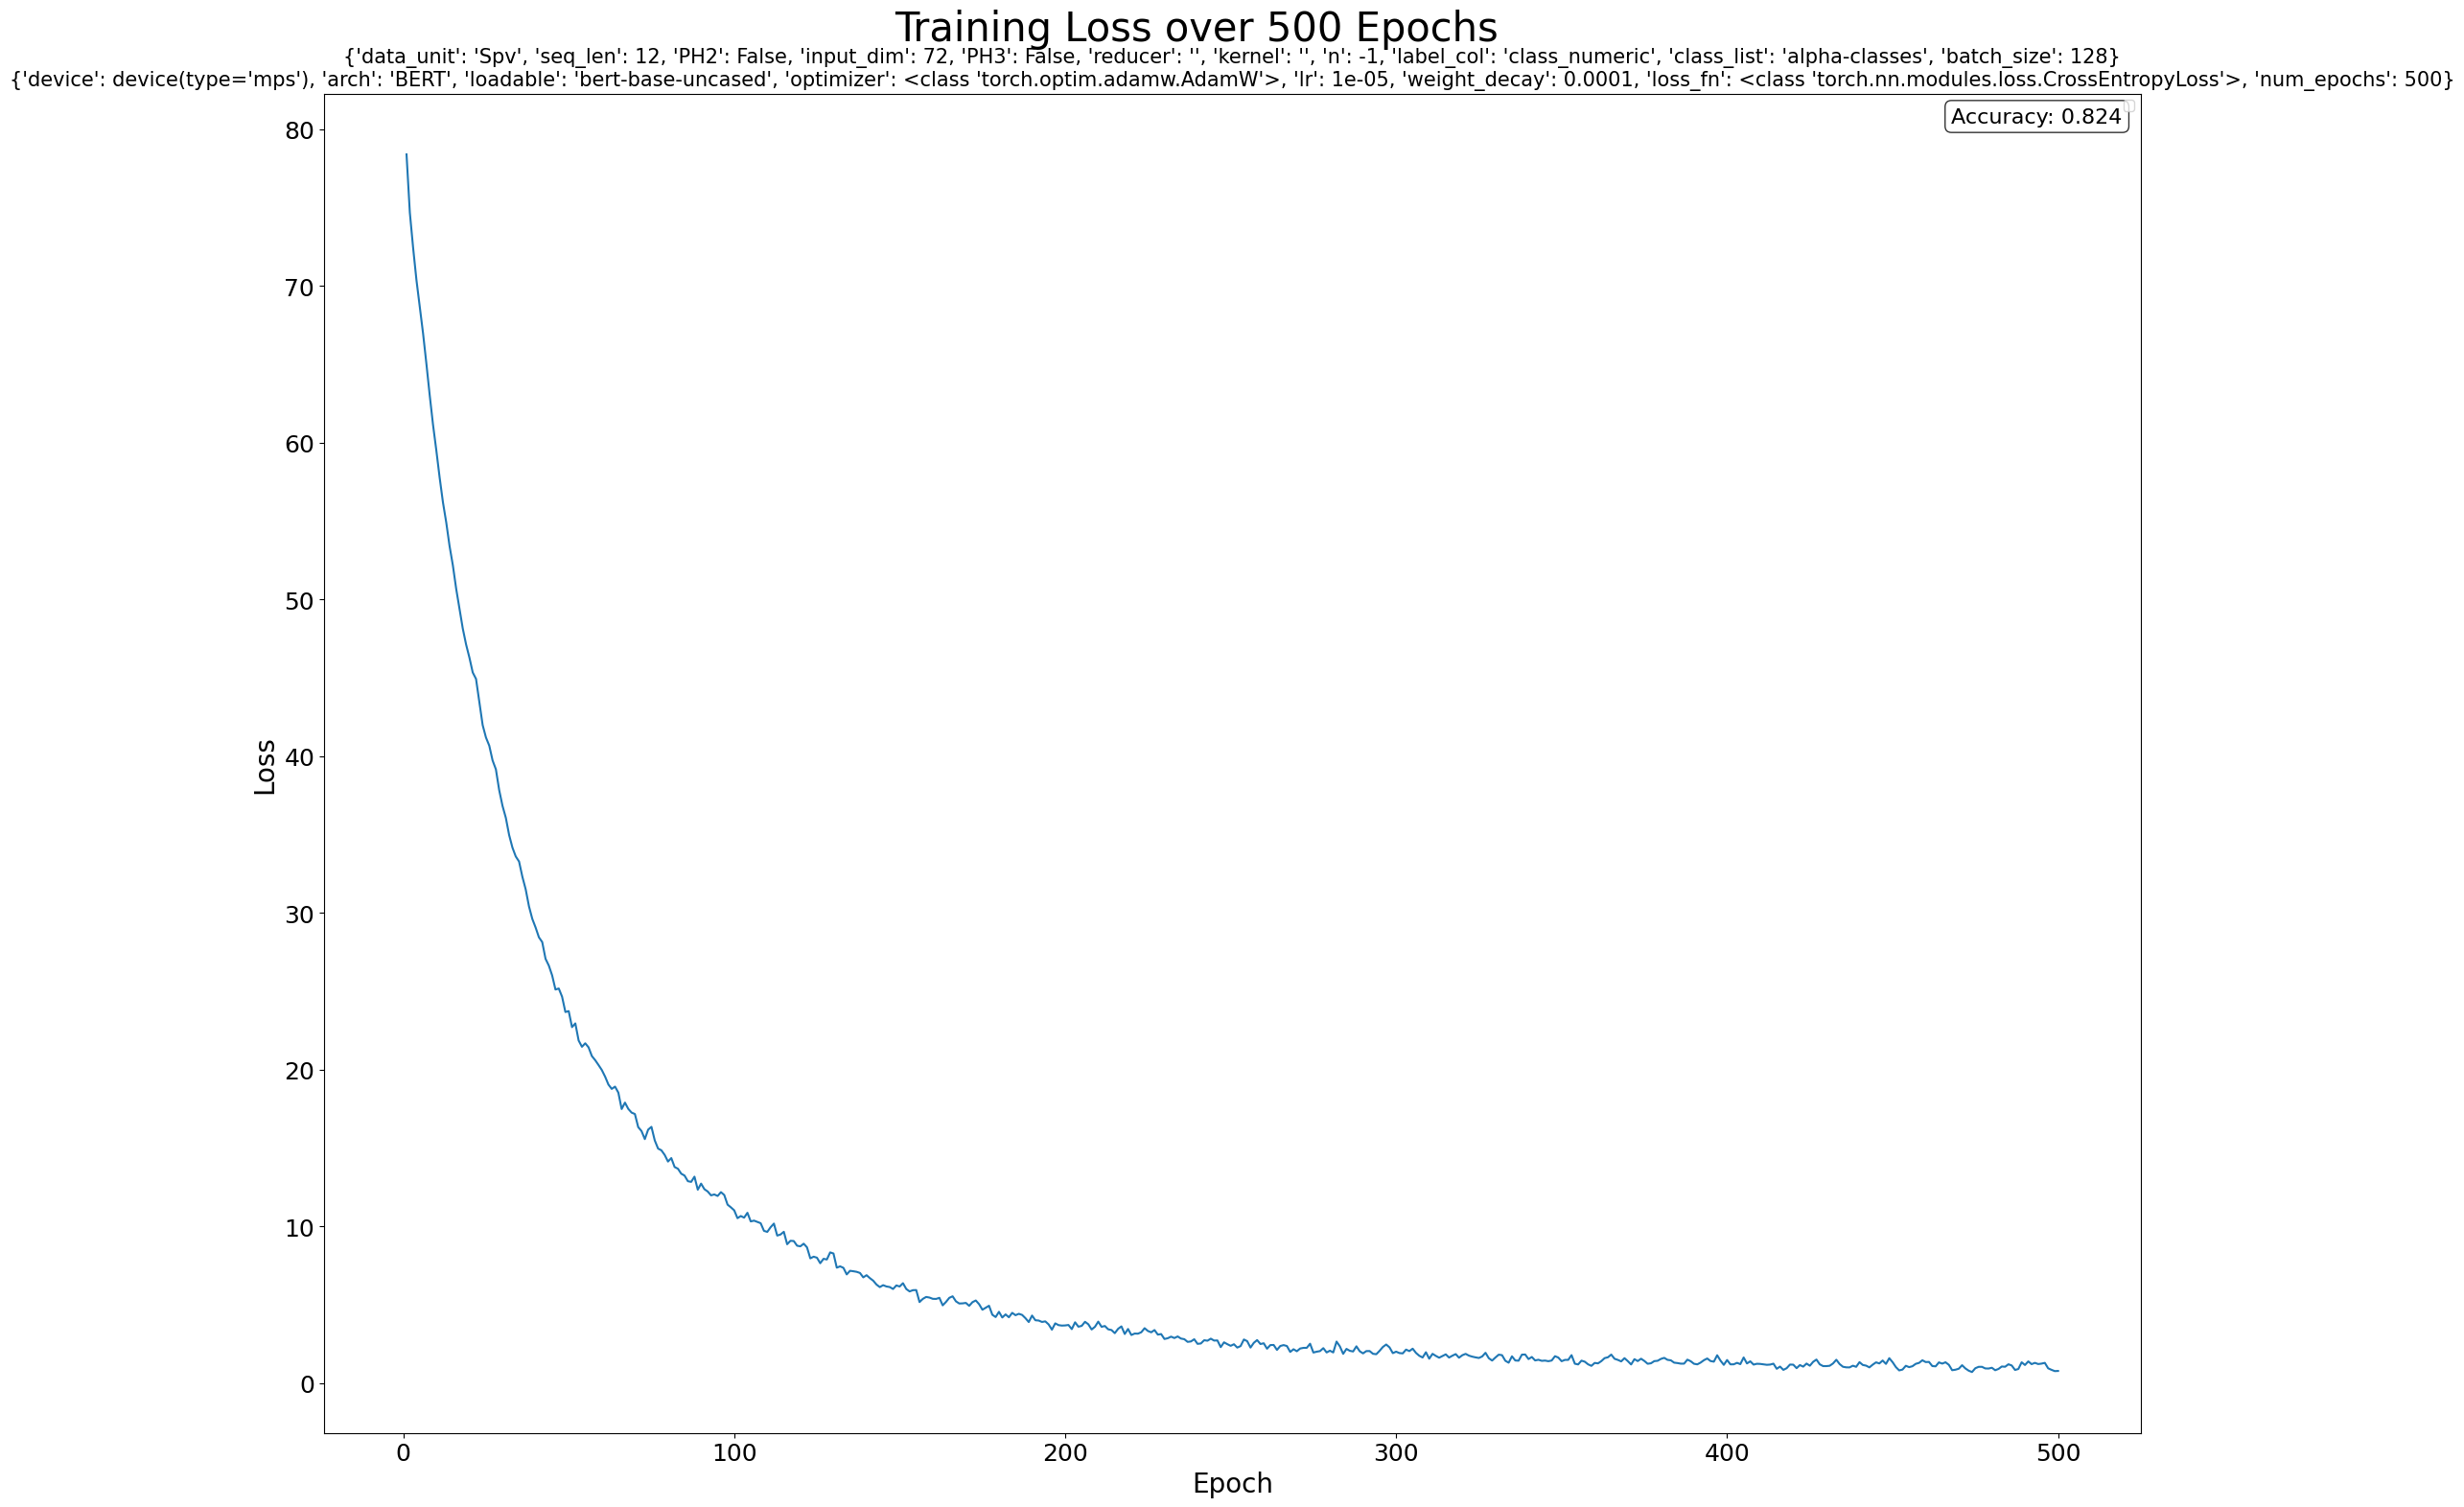

In [7]:
model.score()
print(model.accuracy)
model.show_loss()

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spv/bert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spv/bert-base-uncased exists. Continuing with execution


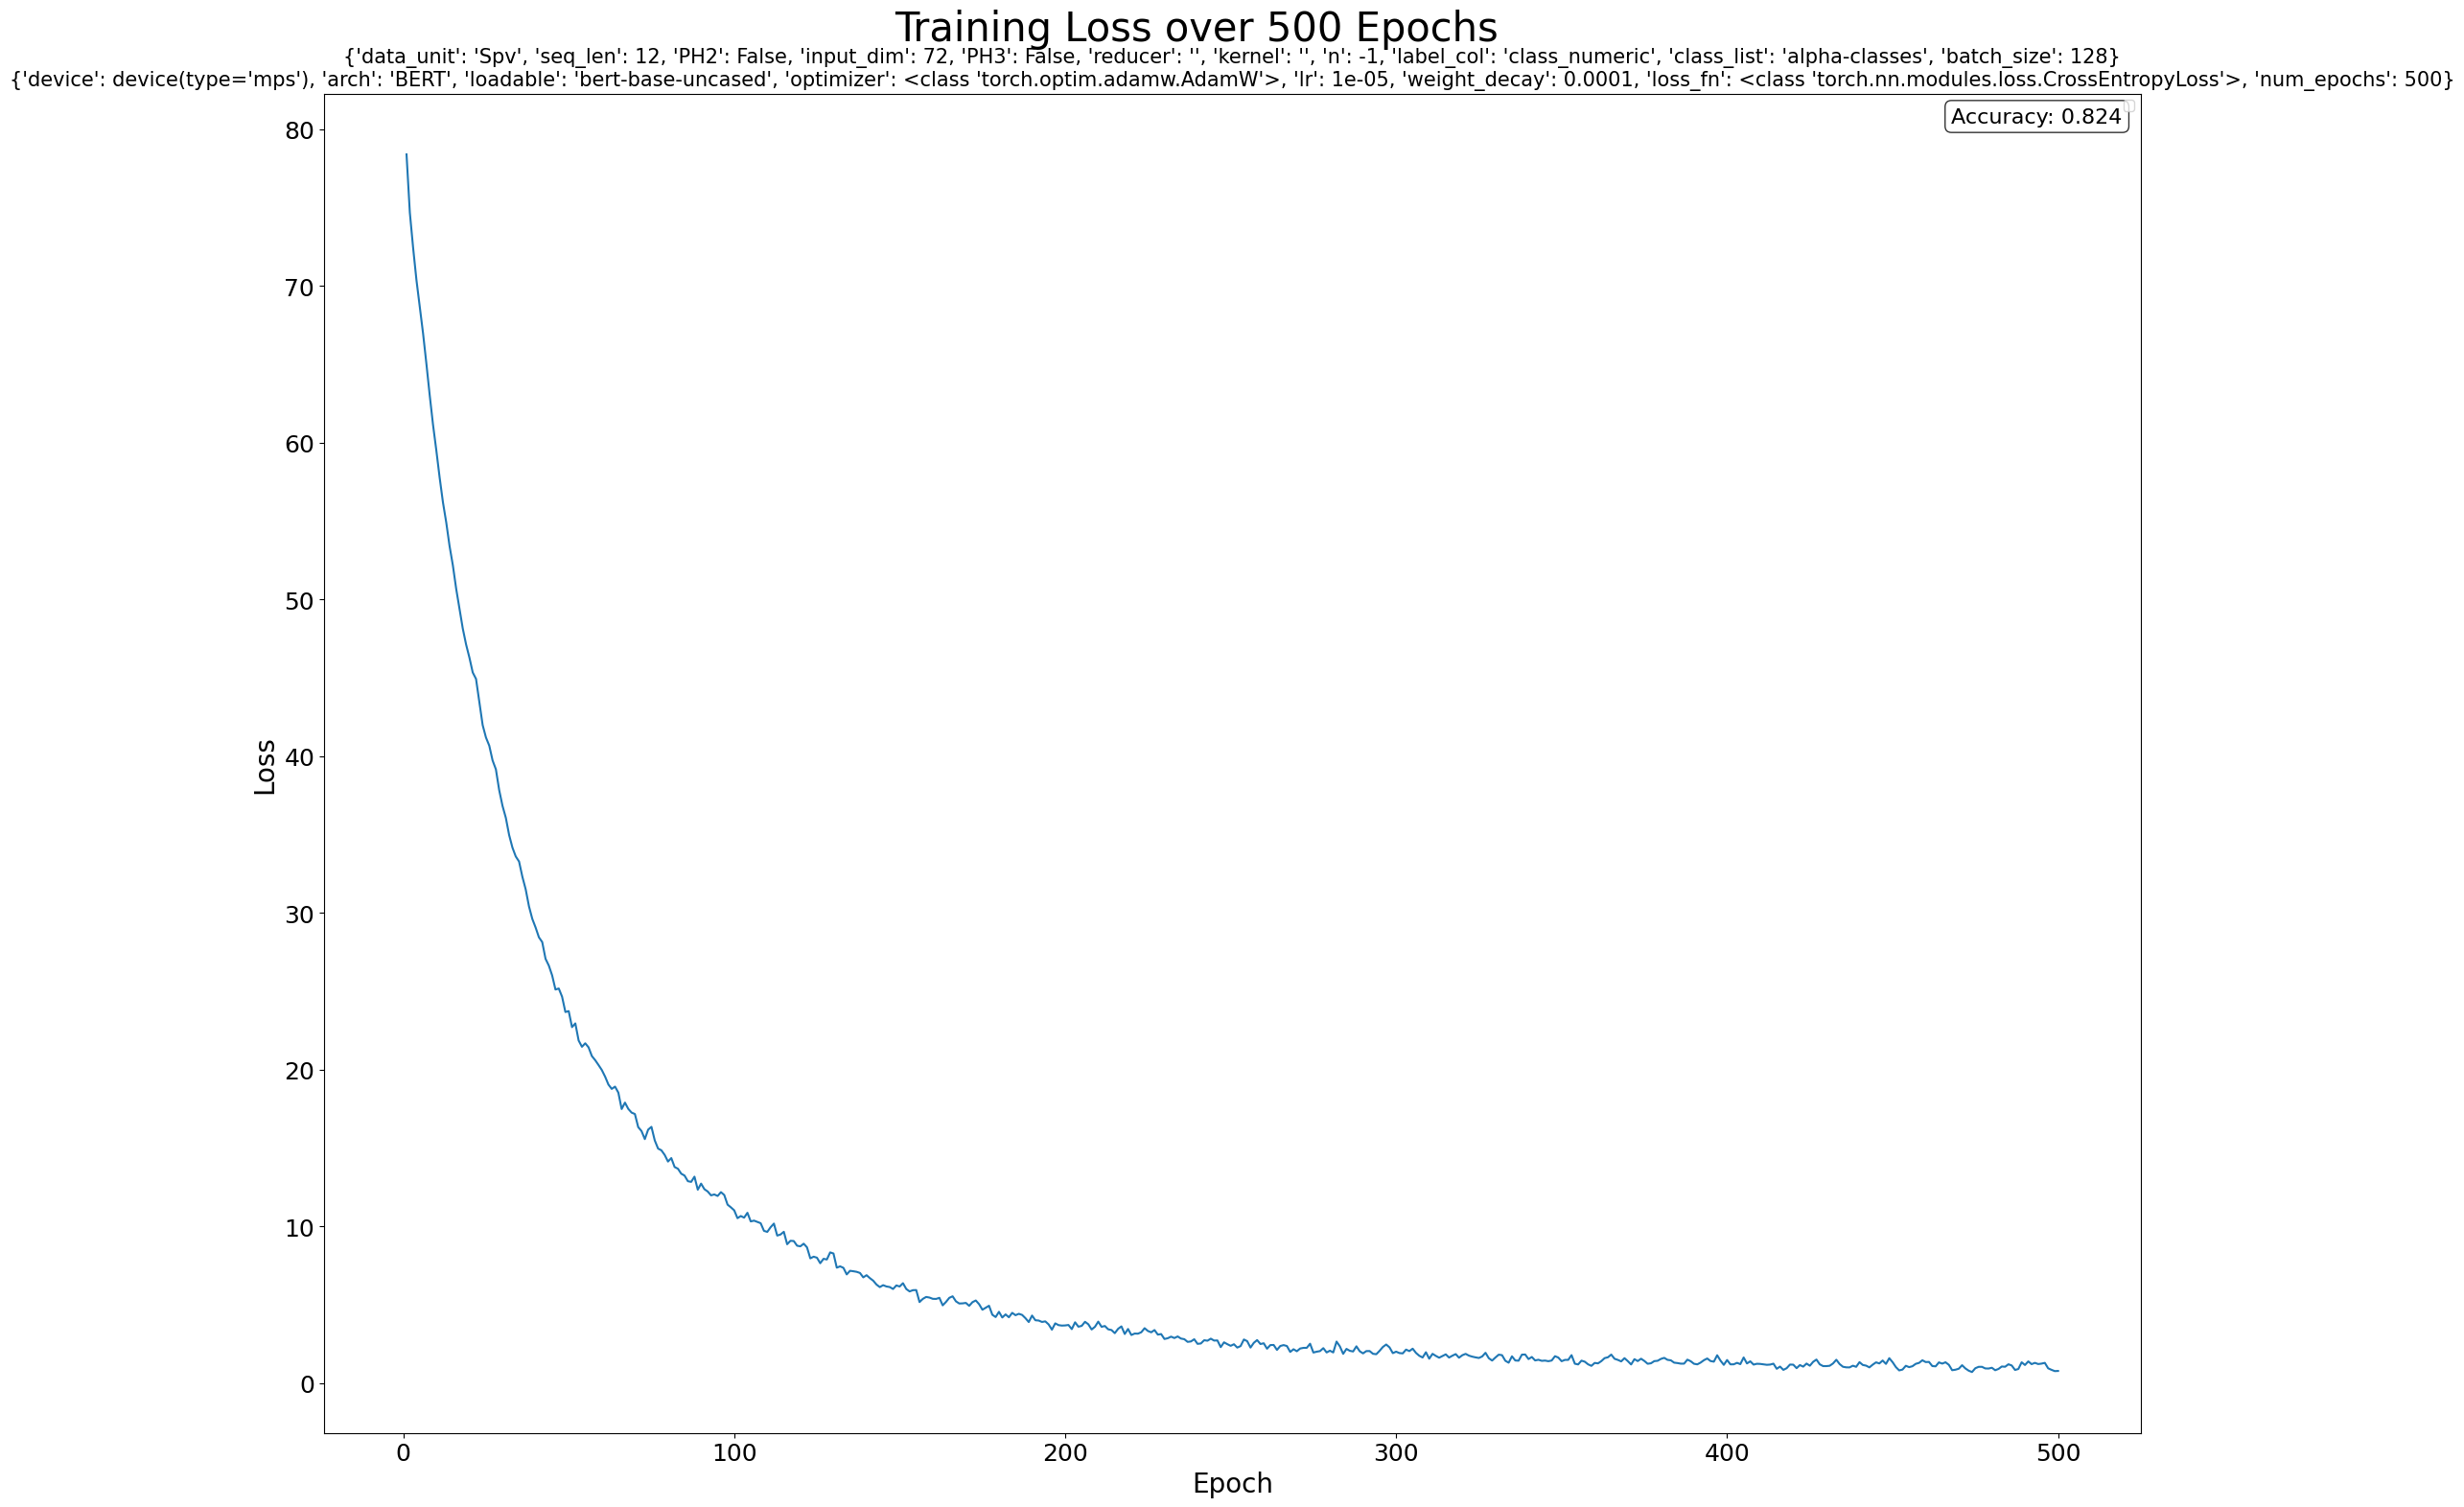

In [8]:
model.keep()